In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9

In [3]:
pd.set_option('display.max_columns()', None)

In [4]:
url_dec = "ride_times_nextbike_2019-12.csv.gz"
url_jan = "ride_times_nextbike_2020-01.csv.gz"
url_jun = "ride_times_nextbike_2020-06.csv.gz"

new_processed_jun = "processed_data_nextbike_2020-06cc.csv"
old_processed_jun = "processed_data_nextbike_2020-06-old.csv.gz"

#standing_data_jan = "station_times_for_fixing_data_nextbike_2020-01.csv.gz"
standing_data_jun = "station_times_for_fixing_data_nextbike_2020-06.csv.gz"


df_dec = pd.read_csv(url_dec, sep=';', low_memory=False)
df_jan = pd.read_csv(url_jan, sep=';', low_memory=False)
df_jun = pd.read_csv(url_jun, sep=';', low_memory=False)

new_processed_df_jun = pd.read_csv(new_processed_jun, sep=';', low_memory=False)
old_processed_df_jun = pd.read_csv(old_processed_jun, sep=';', low_memory=False)

#standing_data_df_jan = pd.read_csv(standing_data_jan, sep=';', low_memory=False)
standing_data_df_jun = pd.read_csv(standing_data_jun, sep=';', low_memory=False)

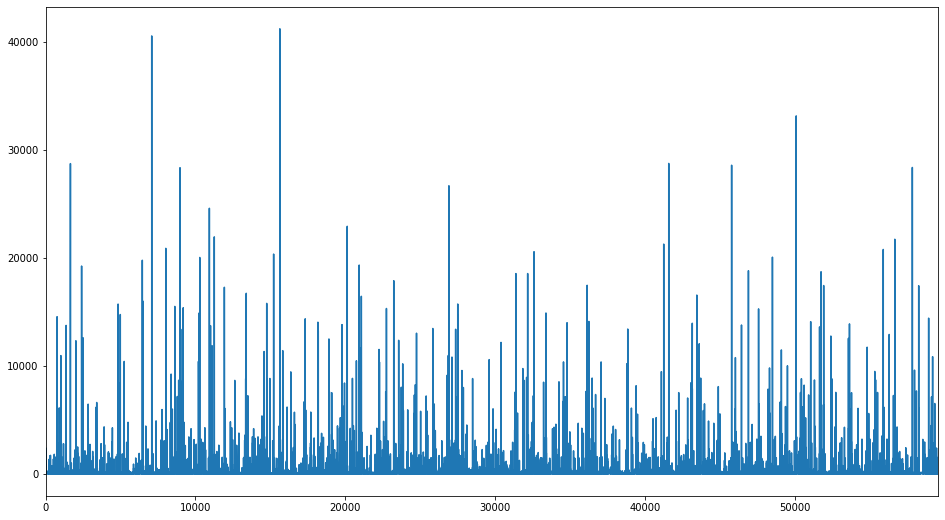

In [5]:
df_dec['ride_time_minutes'].plot()

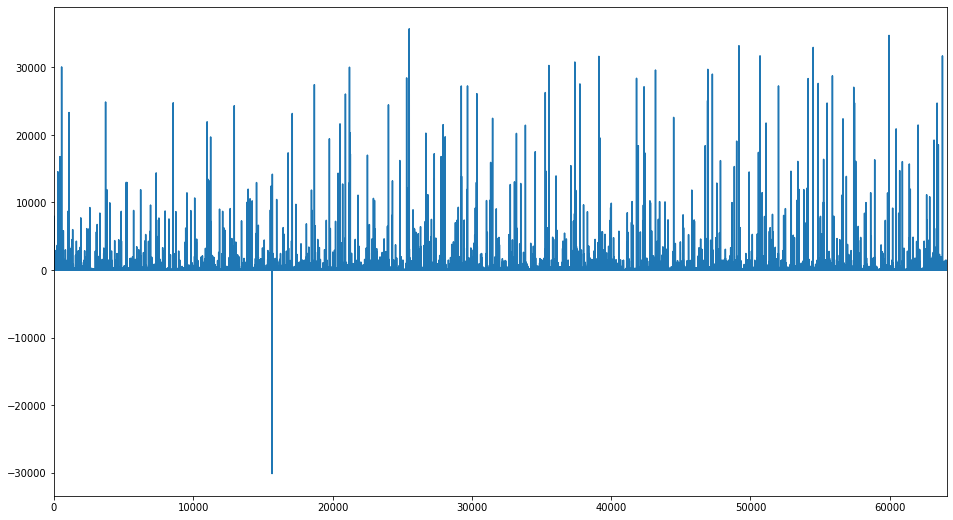

In [6]:
df_jan['ride_time_minutes'].plot()

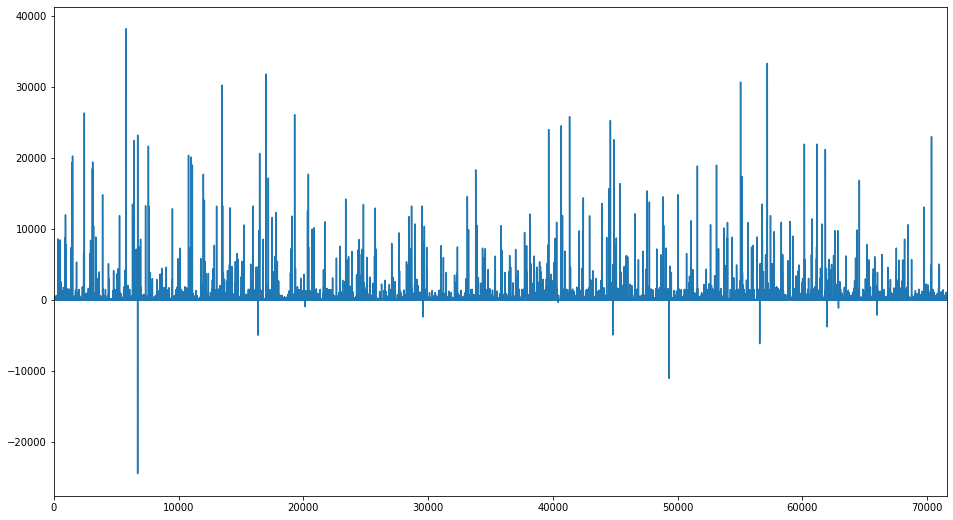

In [7]:
df_jun['ride_time_minutes'].plot()

In [8]:
def negative_values(ndf):
    negative_results = {}
    for index, row in ndf.iterrows():
        if ndf['ride_time_minutes'][index] < 0:
            negative_results[index] = ndf['ride_time_minutes'][index]
    return negative_results

In [9]:
negative_results_dec = negative_values(df_dec)
negative_results_dec

{}

In [10]:
negative_results_jan = negative_values(df_jan)
negative_results_jan

{15655: -30122.0}

In [11]:
negative_results_jun = negative_values(df_jun)
negative_results_jun

{6711: -24486.0,
 16373: -4987.0,
 20126: -954.0,
 29607: -2405.0,
 40436: -363.0,
 44817: -4956.0,
 49327: -11072.0,
 56587: -6175.0,
 61996: -3812.0,
 62903: -1168.0,
 66004: -2164.0}

In [12]:
df_jun.iloc[6711]["name"]

'BIKE 22735'

In [13]:
ride_bike_records = df_jun[df_jun['name']=='BIKE 22735']
ride_bike_records

,index,lat_begin,lng_begin,lat_end,lng_end,ride_begin,ride_end,ride_time_minutes,uid_begin,uid_end,address,name,bike,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,maintenance,number,place_type,rack_locks,special_racks,spot,terminal_type,city,country_code,company,timezone,available_bikes
6710,6794,50.915831,6.941155,50.972592,6.951461,2020-06-01 00:49:02.008989,2020-06-02 18:17:01.497105,2488.0,30468304,10972507,NaN,BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1058
6711,6795,50.972592,6.951461,50.931489,6.925825,2020-06-22 18:35:02.159039,2020-06-05 18:29:02.431139,-24486.0,10972507,30657510,NaN,BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1077
6712,6796,50.931489,6.925825,50.943652,6.921322,2020-06-05 21:05:01.827903,2020-06-05 21:14:01.941371,9.0,30657510,30663403,NaN,BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1088
6713,6797,50.943652,6.921322,50.932335,6.921271,2020-06-05 22:01:02.351198,2020-06-05 22:14:01.770036,13.0,30663403,30664867,NaN,BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1076
6714,6798,50.932335,6.921271,50.932931,6.956089,2020-06-06 11:27:02.032140,2020-06-06 11:45:01.646690,18.0,30664867,30676426,NaN,BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1081
6715,6799,50.932931,6.956089,50.977367,6.960112,2020-06-06 16:14:01.687234,2020-06-22 18:41:01.875260,23187.0,30676426,31388757,Blaubach 2 50676 Köln,BIKE 22735,True,0,0,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1091
6716,6800,50.977367,6.960112,50.927724,6.939915,2020-06-23 07:28:01.639645,2020-06-23 08:02:02.629447,34.0,31388757,31411014,NaN,BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1152
6717,6801,50.927724,6.939915,50.930325,6.927014,2020-06-23 09:44:01.464361,2020-06-23 10:03:02.023124,19.0,31411014,31415017,NaN,BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1162
6718,6802,50.930325,6.927014,50.924519,6.959486,2020-06-25 16:21:01.443002,2020-06-29 06:37:02.356454,5176.0,31415017,31712889,"Universitätsstr. 16, 50973 Köln",BIKE 22735,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1159


In [14]:
standing_data_bike_records = standing_data_df_jun[standing_data_df_jun['name']=='BIKE 22735']
standing_data_bike_records

,lat,lng,time_begin,time_end,standing_time_minutes,uid,name,address,bike,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,maintenance,number,place_type,rack_locks,special_racks,spot,terminal_type,city,country_code,company,timezone,available_bikes
98012,50.915831,6.941155,2020-06-01 00:00:02.340680,2020-06-01 00:49:02.008989,49.0,30468304,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1058
98013,50.964262,6.962962,2020-06-02 18:17:01.497105,2020-06-02 18:17:01.497105,0.0,10972507,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1077
98014,50.964274,6.962918,2020-06-02 18:18:02.572153,2020-06-04 18:58:01.644745,2920.0,10972507,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1077
98015,50.931489,6.925825,2020-06-05 18:29:02.431139,2020-06-05 21:05:01.827903,156.0,30657510,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1088
98016,50.943652,6.921322,2020-06-05 21:14:01.941371,2020-06-05 22:01:02.351198,47.0,30663403,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1076
98017,50.932335,6.921271,2020-06-05 22:14:01.770036,2020-06-06 11:27:02.032140,793.0,30664867,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1081
98018,50.932931,6.956089,2020-06-06 11:45:01.646690,2020-06-06 16:14:01.687234,269.0,30676426,BIKE 22735,Blaubach 2 50676 Köln,True,0,0,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1091
98019,50.972592,6.951461,2020-06-22 17:31:02.980184,2020-06-22 18:35:02.159039,64.0,10972507,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1148
98020,50.977367,6.960112,2020-06-22 18:41:01.875260,2020-06-23 07:28:01.639645,767.0,31388757,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1152
98021,50.927724,6.939915,2020-06-23 08:02:02.629447,2020-06-23 09:44:01.464361,102.0,31411014,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1162


In [15]:
old_processed_bike_records = old_processed_df_jun[old_processed_df_jun['name']=='BIKE 22735']
old_processed_bike_records

,lat,lng,time_begin,time_end,standing_time_minutes,uid,name,address,bike,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,maintenance,number,place_type,rack_locks,special_racks,spot,terminal_type,city,country_code,company,timezone,available_bikes
56590,50.915831,6.941155,2020-06-01 00:00:02.340680,2020-06-01 00:49:02.008989,49.0,30468304,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1058
56591,50.972592,6.951461,2020-06-02 18:17:01.497105,2020-06-22 18:35:02.159039,28818.0,10972507,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1077
56592,50.931489,6.925825,2020-06-05 18:29:02.431139,2020-06-05 21:05:01.827903,156.0,30657510,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1088
56593,50.943652,6.921322,2020-06-05 21:14:01.941371,2020-06-05 22:01:02.351198,47.0,30663403,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1076
56594,50.932335,6.921271,2020-06-05 22:14:01.770036,2020-06-06 11:27:02.032140,793.0,30664867,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1081
56595,50.932931,6.956089,2020-06-06 11:45:01.646690,2020-06-06 16:14:01.687234,269.0,30676426,BIKE 22735,Blaubach 2 50676 Köln,True,0,0,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1091
56596,50.977367,6.960112,2020-06-22 18:41:01.875260,2020-06-23 07:28:01.639645,767.0,31388757,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1152
56597,50.927724,6.939915,2020-06-23 08:02:02.629447,2020-06-23 09:44:01.464361,102.0,31411014,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1162
56598,50.930325,6.927014,2020-06-23 10:03:02.023124,2020-06-25 16:21:01.443002,3258.0,31415017,BIKE 22735,"Universitätsstr. 16, 50973 Köln",True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1159
56599,50.924519,6.959486,2020-06-29 06:37:02.356454,2020-06-29 06:38:01.871005,1.0,31712889,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1146


In [16]:
new_processed_bike_records = new_processed_df_jun[new_processed_df_jun['name']=='BIKE 22735']
new_processed_bike_records

,lat,lng,time_begin,time_end,standing_time_minutes,uid,name,address,bike,bike_racks,bikes,booked_bikes,free_racks,free_special_racks,maintenance,number,place_type,rack_locks,special_racks,spot,terminal_type,city,country_code,company,timezone,available_bikes
56590,50.915831,6.941155,2020-06-01 00:00:02.340680,2020-06-01 00:49:02.008989,49.0,30468304,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1058
56591,50.964274,6.962918,2020-06-02 18:17:01.497105,2020-06-04 18:58:01.644745,2921.0,10972507,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1077
56592,50.931489,6.925825,2020-06-05 18:29:02.431139,2020-06-05 21:05:01.827903,156.0,30657510,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1088
56593,50.943652,6.921322,2020-06-05 21:14:01.941371,2020-06-05 22:01:02.351198,47.0,30663403,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1076
56594,50.932335,6.921271,2020-06-05 22:14:01.770036,2020-06-06 11:27:02.032140,793.0,30664867,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1081
56595,50.932931,6.956089,2020-06-06 11:45:01.646690,2020-06-06 16:14:01.687234,269.0,30676426,BIKE 22735,Blaubach 2 50676 Köln,True,0,0,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1091
56596,50.977367,6.960112,2020-06-22 18:41:01.875260,2020-06-23 07:28:01.639645,767.0,31388757,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1152
56597,50.927724,6.939915,2020-06-23 08:02:02.629447,2020-06-23 09:44:01.464361,102.0,31411014,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1162
56598,50.930325,6.927014,2020-06-23 10:03:02.023124,2020-06-25 16:21:01.443002,3258.0,31415017,BIKE 22735,"Universitätsstr. 16, 50973 Köln",True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1159
56599,50.924519,6.959486,2020-06-29 06:37:02.356454,2020-06-29 06:38:01.871005,1.0,31712889,BIKE 22735,NaN,True,0,1,0,0,0,False,0,12,False,0,False,NaN,Köln,DE,Nextbike,Europe/Berlin,1146
